In [93]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [94]:
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [95]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)


In [96]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [97]:
clf.score(X_test, y_test)

0.9736842105263158

In [98]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [99]:
import numpy as np

def tpr(y_pred, y_true, class_label):
    tp = np.sum((y_pred == class_label) & (y_true == class_label))
    fn = np.sum((y_pred != class_label) & (y_true == class_label))
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0

def fpr(y_pred, y_true, class_label):
    fp = np.sum((y_pred == class_label) & (y_true != class_label))
    tn = np.sum((y_pred != class_label) & (y_true != class_label))
    return fp / (fp + tn) if (fp + tn) > 0 else 0.0

def precision(y_pred, y_true, class_label):
    tp = np.sum((y_pred == class_label) & (y_true == class_label))
    fp = np.sum((y_pred == class_label) & (y_true != class_label))
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0

def recall(y_pred, y_true, class_label):
    return tpr(y_pred, y_true, class_label)  # same as TPR

def f1score(y_pred, y_true, class_label):
    p = precision(y_pred, y_true, class_label)
    r = recall(y_pred, y_true, class_label)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0.0


In [100]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [101]:
y_score = clf.predict_proba(X_test)[:, 1] # target values
_, _, thresholds = roc_curve(y_test, y_score, pos_label=1)


In [102]:
results = []
y_pred = clf.predict(X_test)
for class_label in np.unique(y_test):
    label_name = iris.target_names[class_label]
    true_p = tpr(y_pred, y_test, class_label)
    false_p = fpr(y_pred, y_test, class_label)
    prec = precision(y_pred, y_test, class_label)
    rec = recall(y_pred, y_test, class_label)
    f = f1score(y_pred, y_test, class_label)

    results.append({
        "Class": label_name,
        "TPR (Recall)": round(true_p, 3),
        "FPR": round(false_p, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1 Score": round(f, 3)
    })

# --- Convert to Table ---
df_results = pd.DataFrame(results)
print(df_results)


        Class  TPR (Recall)    FPR  Precision  Recall  F1 Score
0      setosa         1.000  0.000        1.0   1.000     1.000
1  versicolor         0.938  0.000        1.0   0.938     0.968
2   virginica         1.000  0.034        0.9   1.000     0.947


In [103]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [104]:
for i in range(0,3):
    tpr, fpr, _ = roc_curve(y_test, y_score, pos_label=i)
    print(f"Class {i} - TPR: {tpr}, FPR: {fpr}, Thresholds: {thresholds}")

Class 0 - TPR: [0.   0.04 0.88 0.88 0.92 0.92 0.96 0.96 1.   1.  ], FPR: [0.         0.         0.         0.30769231 0.30769231 0.61538462
 0.61538462 0.92307692 0.92307692 1.        ], Thresholds: [       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]
Class 1 - TPR: [0.         0.         0.         0.09090909 0.09090909 1.        ], FPR: [0.     0.0625 0.9375 0.9375 1.     1.    ], Thresholds: [       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]
Class 2 - TPR: [0.         0.03448276 0.51724138 0.51724138 0.55172414 0.55172414
 0.68965517 0.68965517 0.82758621 0.82758621 0.96551724 0.96551724
 1.        ], FPR: [0.         0.         0.         0.22222222 0.22222222 0.66666667
 0.66666667 0.77777778 0.77777778 0.88888889 0.88888889 1.
 1.        ], Thresholds: [       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]


[       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]


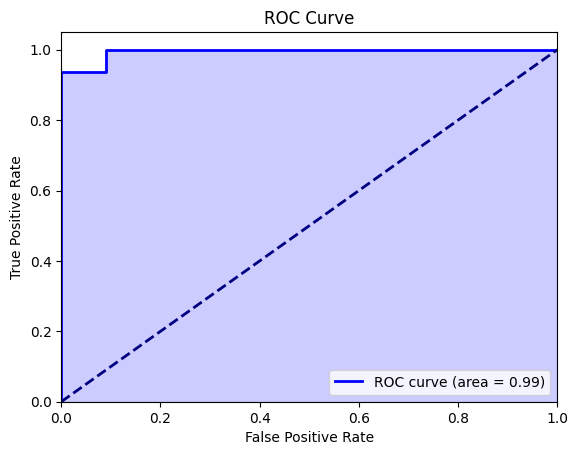

In [105]:
# Use the FPR and TPR arrays from roc_curve (cell 8)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
print(thresholds)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])    
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

##### Classification of Digits Dataset using Logistic Regression #####

In [106]:
digits = load_digits()
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [107]:
X_digits, y_digits = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=0)

In [108]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [109]:
clf.score(X_test, y_test)

0.9533333333333334

In [110]:
# coefficients
coefficients = clf.coef_
coefficients.shape

(10, 64)

In [111]:
y_pred = clf.coef_ @ X_test.T
y_pred = np.argmax(y_pred, axis=0)

In [112]:
y_pred_1= clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


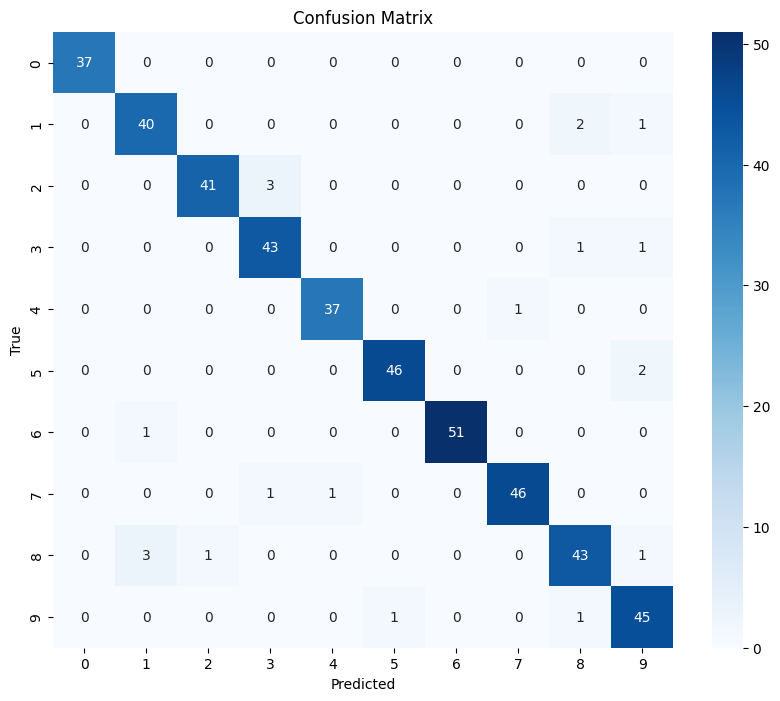

In [113]:
cm = confusion_matrix(y_test, y_pred_1)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [114]:
# saving this model as pickle file
import pickle
with open('models/logistic_regression_digits.pkl', 'wb') as f:
    pickle.dump(clf, f)
# Load the model from the pickle file
with open('models/logistic_regression_digits.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

Checking if linear regression can be used for classification tasks. With Softmax activation function, it can be used for multi-class classification.

```python

score: 0.4
All predictions: [0 0 1 0 1 1 1 1 1 0]


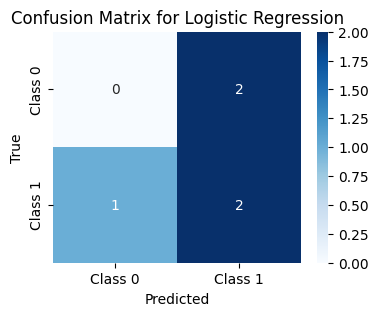

In [115]:
X = np.array([[1.9],
            [1.3],
            [3.5],
            [1.2],
            [9.5],
            [2.5],
            [7.5],
            [3.2],
            [4.2],
            [1.8],
        ])  # Each value is a sample with 1 feature
y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1])  # Example binary target variable
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X[:5], y[:5])
y_pred = clf.predict(X[5:])
print(f"score: {clf.score(X[5:], y[5:])}")
y_all_pred = clf.predict(X[:])
print(f"All predictions: {y_all_pred}")
cm = confusion_matrix(y[5:], y_pred)
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])   
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

All predictions: [0 0 1 0 1 0 1 1 1 0]
score: 0.60


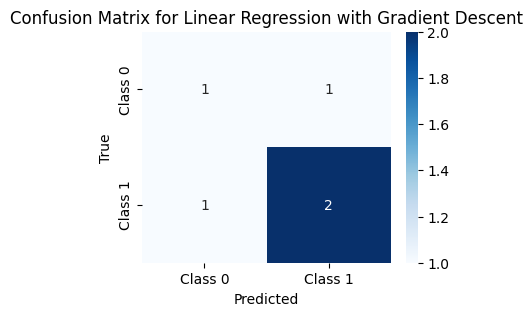

In [116]:
from sklearn.linear_model import LinearRegression
# linear regression from scratch using gradient descent
# X = np.array([[1.9],
#             [1.3],
#             [3.5],
#             [1.2],
#             [9.5],
#             [2.5],
#             [2.2],
#             [3.2],
#             [3.5],
#             [1.2]])  # Each value is a sample with 1 feature
# y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])  # Example binary target variable
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_predicted = np.dot(X, self.weights) + self.bias
        
        error = [y_predicted - y,]
        for _ in range(1, self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.sum(np.dot(X.T, (y_predicted - y)))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def predict(self, X):
        y = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(y)  # Apply sigmoid to get probabilities
        
        return y_pred >= 0.60
# Example usage
my_lr_model = LinearRegressionGD(learning_rate=0.01, n_iterations=30)
my_lr_model.fit(X[:5], y[:5])
y_pred = my_lr_model.predict(X[5:])

y_all_pred = my_lr_model.predict(X[:])
ones = np.ones_like(y_all_pred)
# convert boolean predictions to 0 and 1
y_all_pred = np.where(y_all_pred, ones, 1 - ones) 
print(f"All predictions: {y_all_pred}")
print(f"score: {accuracy_score(y[5:], y_pred):.2f}")
# confusion matrix
cm = confusion_matrix(y[5:], y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Linear Regression with Gradient Descent')
plt.show()
# Visualizing the predictions


## Decision Trees

In [117]:
import numpy as np

# Feature options
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
subjects = ['me', 'you', 'they', 'us', 'them', 'all']

# Generate 100 samples
np.random.seed()  # for reproducibility
X = np.array([[np.random.choice(colors), np.random.choice(subjects)] for _ in range(100)])

# Generate target labels randomly between 0 and 1
y = np.random.randint(0, 2, size=100)


In [118]:
# label encoding
df = pd.DataFrame(X, columns=['color', 'person'])
df['label'] = y


In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [120]:
for col in df.columns:
    df[col] = le.fit_transform(df[col]) 


In [121]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()  


In [122]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[['color', 'person']], df['label'], test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [123]:
clf.score(X_test, y_test)

0.45

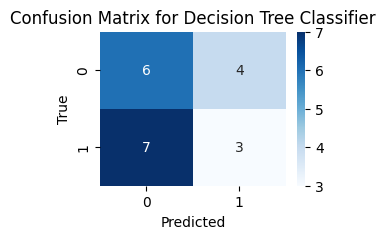

In [124]:
# confusion matrix
y_pred = clf.predict(X_test[['color', 'person']])
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


0.6


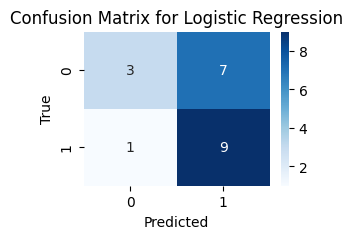

In [125]:
logR = LogisticRegression(max_iter=200)
logR.fit(X_train, y_train)
print(logR.score(X_test, y_test))

# confusion matrix for logistic regression
y_pred = logR.predict(X_test[['color', 'person']])
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


- we see that logistic regression has performed worse than decision trees, which is expected as decision trees can capture non-linear relationships in the data.

#### Doing classification on Digits Dataset

```python

In [126]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=381)

In [127]:
# importing all classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier



In [128]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [129]:
svc_clf = SVC(probability=True)
svc_clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [130]:
# logistic regression
logR_clf = LogisticRegression(max_iter=200)
logR_clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [131]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [132]:
# testing the classifiers
print(f"Decision Tree Classifier Score: {dt_clf.score(X_test, y_test)}")
print(f"SVC Classifier Score: {svc_clf.score(X_test, y_test)}")
print(f"Logistic Regression Classifier Score: {logR_clf.score(X_test, y_test)}")
print(f"Random Forest Classifier Score: {rf_clf.score(X_test, y_test)}")

Decision Tree Classifier Score: 0.8711111111111111
SVC Classifier Score: 0.9955555555555555
Logistic Regression Classifier Score: 0.9711111111111111
Random Forest Classifier Score: 0.9733333333333334


In [133]:
# tweaking parameters of each model and fitting again to compare score
dt_clf = DecisionTreeClassifier(ccp_alpha=0.00001)
dt_clf.fit(X_train, y_train)
svc_clf = SVC(probability=True, C=3.33, kernel='poly', degree=3, gamma='scale')
svc_clf.fit(X_train, y_train)
logR_clf = LogisticRegression(max_iter=200, C=3.33, multi_class='auto')
logR_clf.fit(X_train, y_train)
rf_clf = RandomForestClassifier(n_estimators=20, max_depth=100)
rf_clf.fit(X_train, y_train)
"ok"

d:\Conda\envs\insta\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


'ok'

In [134]:

print(f"Decision Tree Classifier Score after tweaking: {dt_clf.score(X_test, y_test)}")
print(f"SVC Classifier Score after tweaking: {svc_clf.score(X_test, y_test)}")
print(f"Logistic Regression Classifier Score after tweaking: {logR_clf.score(X_test, y_test)}")
print(f"Random Forest Classifier Score after tweaking: {rf_clf.score(X_test, y_test)}")
# Default parameters of each classifier work better than the tuned parameters

Decision Tree Classifier Score after tweaking: 0.8666666666666667
SVC Classifier Score after tweaking: 0.9888888888888889
Logistic Regression Classifier Score after tweaking: 0.9688888888888889
Random Forest Classifier Score after tweaking: 0.9577777777777777


- Default parameters of each classifier work better than the tuned parameters.

In [135]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target    
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


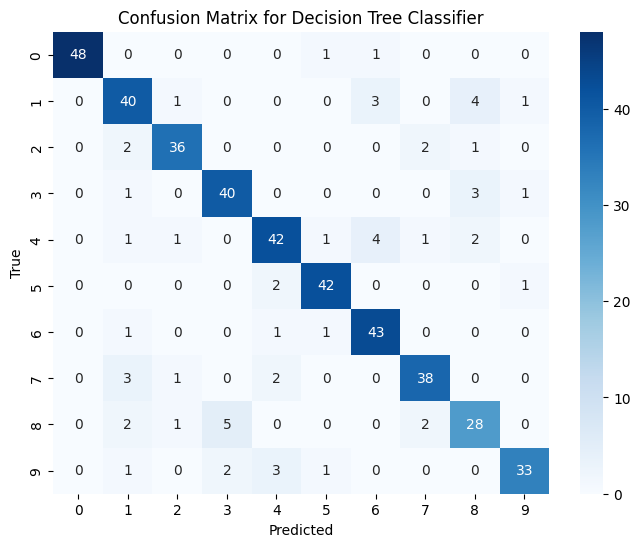

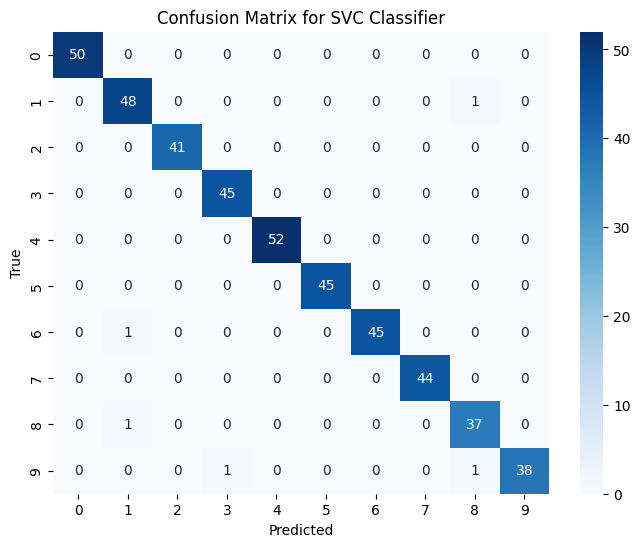

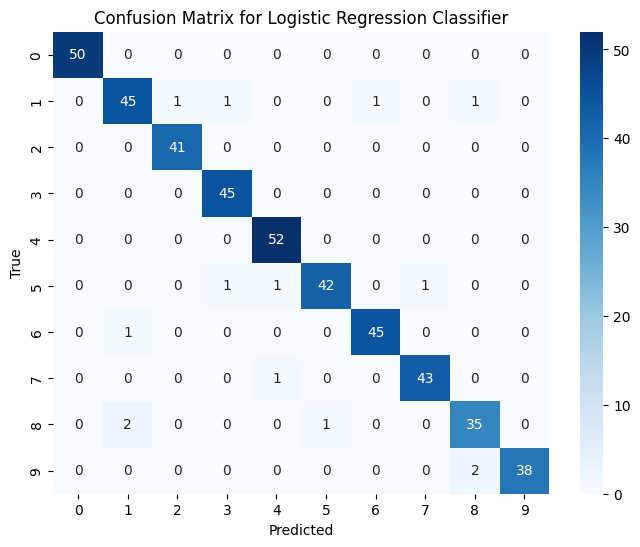

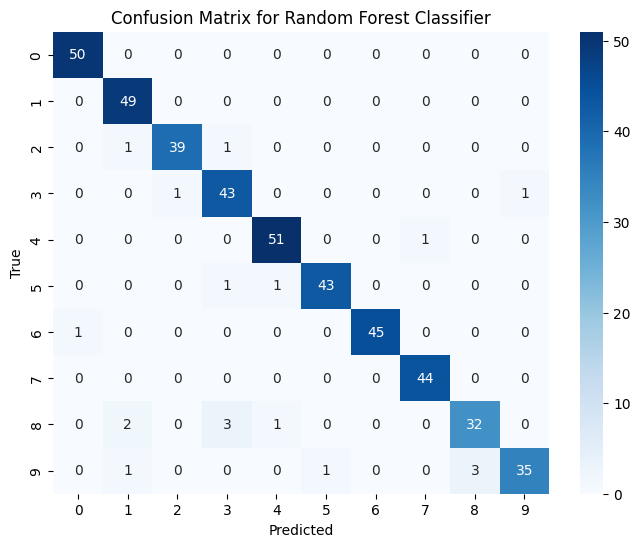

In [136]:
# confusion matrix for all models
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {title}')
    plt.show()
plot_confusion_matrix(dt_clf, X_test, y_test, "Decision Tree Classifier")
plot_confusion_matrix(svc_clf, X_test, y_test, "SVC Classifier")
plot_confusion_matrix(logR_clf, X_test, y_test, "Logistic Regression Classifier")
plot_confusion_matrix(rf_clf, X_test, y_test, "Random Forest Classifier")

In [137]:
# macro and micro average data frame for all models
def get_macro_micro_df(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate macro and micro averages
    macro_avg = np.mean(cm.diagonal() / cm.sum(axis=1))
    micro_avg = np.sum(cm.diagonal()) / np.sum(cm)
    
    return pd.DataFrame({
        'Model': [model_name],
        'Macro Average': [macro_avg],
        'Micro Average': [micro_avg]
    })

In [138]:
res = {}
res['Decision Tree Classifier'] = get_macro_micro_df(dt_clf, X_test, y_test, "Decision Tree Classifier")
res['SVC Classifier'] = get_macro_micro_df(svc_clf, X_test, y_test, "SVC Classifier")
res['Logistic Regression Classifier'] = get_macro_micro_df(logR_clf, X_test, y_test, "Logistic Regression Classifier")
res['Random Forest Classifier'] = get_macro_micro_df(rf_clf, X_test, y_test, "Random Forest Classifier")
macro_micro_df = pd.concat(res.values(), ignore_index=True)
macro_micro_df

,Model,Macro Average,Micro Average
0,Decision Tree Classifier,0.864455,0.866667
1,SVC Classifier,0.988154,0.988889
2,Logistic Regression Classifier,0.967829,0.968889
3,Random Forest Classifier,0.953847,0.957778


In [147]:
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Cross-validation for each model
cv_results = {}
for model, name in zip([dt_clf, svc_clf, logR_clf, rf_clf], 
                       ["Decision Tree", "SVC", "Logistic Regression", "Random Forest"]):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    cv_results[name] = scores

d:\Conda\envs\insta\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be re

In [148]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df['Mean'] = cv_results_df.mean(axis=1)
cv_results_df

,Decision Tree,SVC,Logistic Regression,Random Forest,Mean
0,0.859259,0.992593,0.955556,0.955556,0.940741
1,0.837037,0.992593,0.948148,0.992593,0.942593
2,0.837037,0.955556,0.948148,0.933333,0.918519
3,0.822222,0.970370,0.962963,0.962963,0.929630
4,0.851852,0.985185,0.955556,0.948148,0.935185
5,0.874074,0.992593,0.962963,0.970370,0.950000
6,0.851852,1.000000,0.977778,0.985185,0.953704
7,0.858209,0.977612,0.940299,0.955224,0.932836
8,0.820896,0.977612,0.962687,0.947761,0.927239
9,0.791045,0.992537,0.947761,0.955224,0.921642


In [153]:
cv_results_df.describe()

,Decision Tree,SVC,Logistic Regression,Random Forest,Mean
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.840348,0.983665,0.956186,0.960636,0.935209
std,0.024126,0.013446,0.010820,0.017875,0.011590
min,0.791045,0.955556,0.940299,0.933333,0.918519
25%,0.825926,0.977612,0.948148,0.949917,0.927837
50%,0.844444,0.988861,0.955556,0.955390,0.934011
75%,0.856620,0.992593,0.962894,0.968519,0.942130
max,0.874074,1.000000,0.977778,0.992593,0.953704


In [154]:
# The best model is the one with the highest average score.
# Let's compare the mean cross-validation scores for each model:
best_model_name = cv_results_df[['Decision Tree', 'SVC', 'Logistic Regression', 'Random Forest']].mean().idxmax()
best_score = cv_results_df[best_model_name].mean()
print(f"The best model to use is: {best_model_name} (mean CV score: {best_score:.3f})")

The best model to use is: SVC (mean CV score: 0.984)
